In [330]:
from math import log2
from collections import Counter
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.colheader_justify', 'left')
pd.set_option('display.precision', 5)

In [331]:
alp = ['а','б','в','г','д','е','ж','з','и','й','к','л','м','н','о','п','р','с','т','у','ф','х','ц','ч','ш','щ','ы','ь','э','ю','я',' ']

name_f = 'krasa_ruskava_yazika.txt'

def process_text(name):
    f = open(name_f, 'r', encoding='utf-8')
    text = f.read()
    f.close()
    text = text.lower()
    text = text.replace('ъ', 'ь')
    text = text.replace('ё', 'е')
    text_n = ""
    for l in text:
        if l in alp:
            text_n += l
        else:
           text_n += ' '
    text_n =  " ".join(text_n.split())
    return text_n

a = process_text('krasa_ruskava_yazika.txt')
b = a.replace(' ', '')
##print(Counter(a))
asort = sorted(Counter(a).values())
bsort = sorted(Counter(b).values())
print(Counter(b))

Counter({'о': 66324, 'е': 54106, 'а': 50315, 'и': 47229, 'н': 42802, 'т': 39011, 'с': 36621, 'р': 31397, 'в': 28847, 'л': 27338, 'к': 25000, 'у': 22051, 'м': 20057, 'д': 17727, 'п': 17410, 'я': 13897, 'ь': 13071, 'б': 13025, 'й': 11665, 'ы': 11318, 'х': 10734, 'ч': 10531, 'з': 10342, 'г': 9933, 'ж': 5760, 'ш': 4800, 'ю': 3867, 'ц': 3176, 'ф': 2796, 'щ': 2243, 'э': 1981})


In [332]:
def affi(text):
    i = 0
    for j in Counter(text).values():
        i += j * (j - 1) 
    i = i / (len(text) * (len(text) - 1))
    return i
affi(b)

0.053098482833127306

In [333]:
def calc(sort):
    h = 0
    for i in sort:
        if i/sum(sort) != 0:
            h += (i/sum(sort))*log2(i/sum(sort))
    return -h

h1 = calc(asort)
print(f"H_1 = {h1}")

h1_no_spaces = calc(bsort)
print(f"H_1 without spaces = {h1_no_spaces}")

H_1 = 4.418118868286257
H_1 without spaces = 4.5052822751655155


In [334]:
def table(data):
    df = pd.DataFrame(data, columns = alp, index = alp)    
    for i in range(len(alp)):  
        for j in range(len(alp)):
            for k in data.keys():
                if (str(df.index[i]) + str(df.columns[j])) == k:
                    df.loc[alp[i], alp[j]] = data[k]
    df.dropna                
    return df

def int_bigrams(text):
    count = {}
    p = text[0]
    for i in alp:
        for j in alp:
            count[i + j] = 0
    for l in text[1:]:
        count[p + l] += 1
        p = l
    #print(table(count))
    return count

def int_bigrams_without_sp(text):
    count = {}
    p = text[0]
    for i in alp[:-1]:
        for j in alp[:-1]:
            count[i + j] = 0
    for l in text[1:]:
        count[p + l] += 1
        p = l
    #print(table(count))
    return count

def bigrams(text):
    count = {}
    t = 1
    for i in alp:
        for j in alp:
            count[i + j] = 0
    while t < len(text):
        p = text[t - 1]
        l = text[t]
        count[p + l] += 1
        t = t + 2
    #print(table(count))
    return count

def bigrams_without_sp(text):
    count = {}
    t = 1
    for i in alp[:-1]:
        for j in alp[:-1]:
            count[i + j] = 0
    while t <= len(text):
        p = text[t - 1]
        l = text[t]
        count[p + l] += 1
        t = t + 2
    #print(table(count))
    return count


In [335]:
print("With spaces:")

h2 = calc(int_bigrams(a).values()) / 2
print(f"H_2 with intersection = {h2}")

h2_w_i = calc(bigrams(a).values()) / 2
print(f"H_2 without intersection = {h2_w_i}")

print("Without spaces:")

h2_no_spaces = calc(int_bigrams_without_sp(b).values()) / 2
print(f"H_2 without spaces and with intersection = {h2_no_spaces}")


h2_w_i_no_sp = calc(bigrams_without_sp(b).values()) / 2
print(f"H_2 without intersection and without space = {h2_w_i_no_sp}")

With spaces:
H_2 with intersection = 4.027991959769378
H_2 without intersection = 4.027518991638357
Without spaces:
H_2 without spaces and with intersection = 4.201017242694961
H_2 without intersection and without space = 4.200354905541525


In [336]:
def r(a, b):
    a1 = 1 - a/log2(32)
    b1 = 1 - b/log2(32)
    return a1, b1

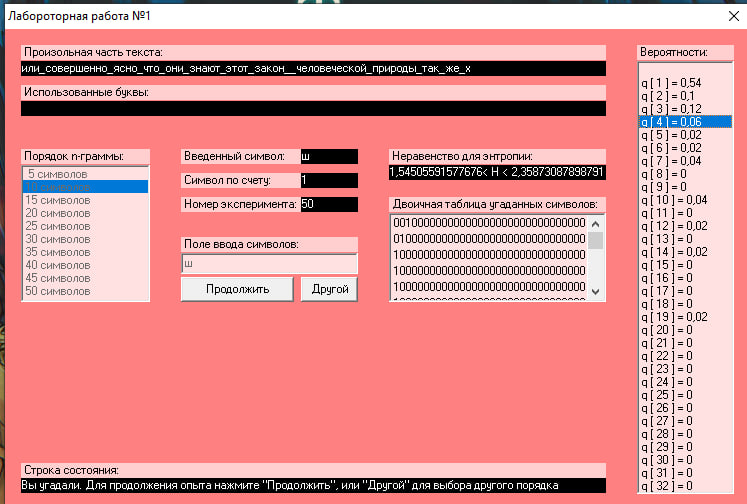

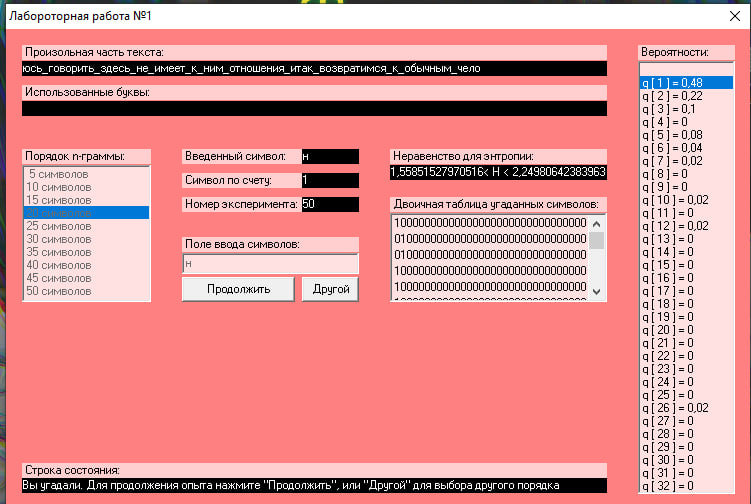

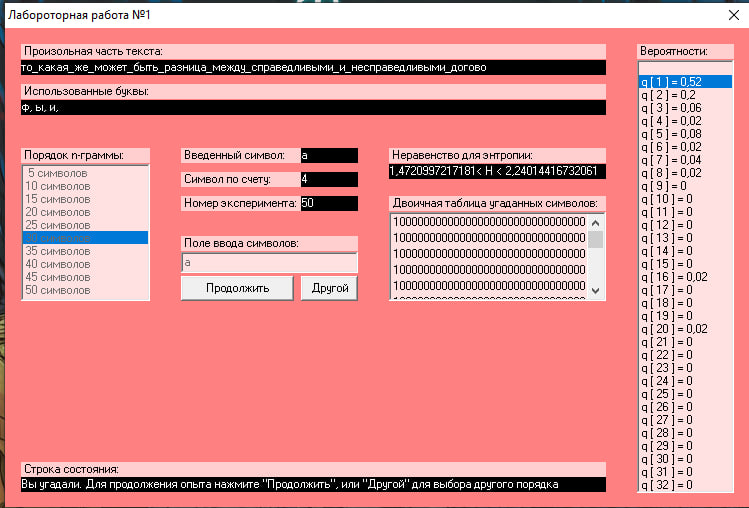

In [337]:
H1_10 = 1.54505591577676
H2_10 = 2.35873087898791
H1_20 = 1.55851527970516
H2_20 = 2.24980642383963
H1_30 = 1.4720997217181
H2_30 = 2.24014416732061

R1_10, R2_10 = r(H1_10, H2_10)
print(f"{round(R2_10, 4)} < R < {round(R1_10, 4)}")
R1_20, R2_20 = r(H1_20, H2_20)
print(f"{round(R2_20, 4)} < R < {round(R1_20, 4)}")
R1_30, R2_30 = r(H1_30, H2_30)
print(f"{round(R2_30, 4)} < R < {round(R1_30, 4)}")

0.5283 < R < 0.691
0.55 < R < 0.6883
0.552 < R < 0.7056
